## Root Finding Using Intermediate Value Theorem



In [1]:
f = sin(x) + sqrt(x) - x
a = 2
b = 3
c = (a+b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.00000000000000 2.50000000000000 3.00000000000000
0.323510989198777 -0.320389025811854 -1.12682918437126


In [2]:
b = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.00000000000000 2.25000000000000 2.50000000000000
0.323510989198777 0.0280731968879212 -0.320389025811854


In [3]:
a = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.25000000000000 2.37500000000000 2.50000000000000
0.0280731968879212 -0.140211467304484 -0.320389025811854


In [4]:
b = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.25000000000000 2.31250000000000 2.37500000000000
0.0280731968879212 -0.0544906460908263 -0.140211467304484


In [5]:
b = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.25000000000000 2.28125000000000 2.31250000000000
0.0280731968879212 -0.0128031748589033 -0.0544906460908263


In [6]:
b = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.25000000000000 2.26562500000000 2.28125000000000
0.0280731968879212 0.00773772805313167 -0.0128031748589033


In [7]:
a = c
c = (a + b)/2
print(N(a), N(c), N(b))
print(N(f(a)), N(f(c)), N(f(b)))

2.26562500000000 2.27343750000000 2.28125000000000
0.00773772805313167 -0.00250720869418353 -0.0128031748589033


In [9]:
print(N(sin(2) + sqrt(2) - 2))
print(N(sin(3) + sqrt(3) - 3))
print(N(sin(c) + sqrt(c) - c))

0.323510989198777
-1.12682918437126
-0.00250720869418353


In [11]:
N(log(0.01)/log(0.5))

6.64385618977472

## Part 2: Derivatives in Sage


In [13]:
derivative(x^2 + 3*x, x)

2*x + 3

In [14]:
derivative(e^(sqrt(4*x^2+2)), x)

4*x*e^(sqrt(4*x^2 + 2))/sqrt(4*x^2 + 2)

## Part 3: Usain Bolt's Peak Speed

In [29]:
S = spline([(0, 1), (1, 2), (4, 5), (5, 3)]);
y = var('y')
spline?

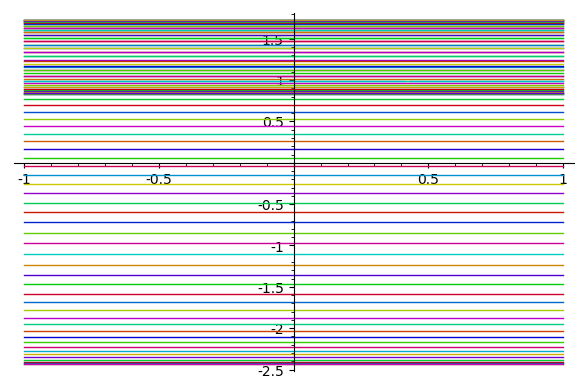

## Part 4: Gaussian Derivatives and Hermite Polynomials

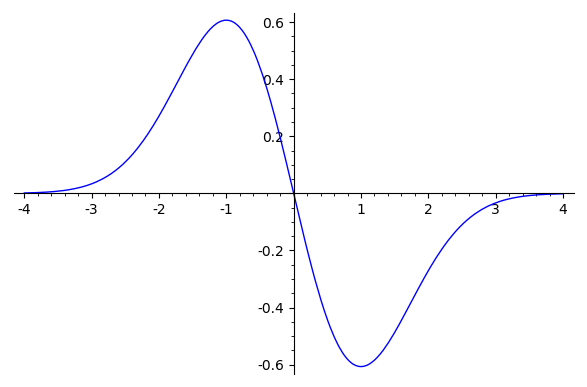

In [39]:
f = e^(-x^2/2)
fprime = derivative(f, x, 1)
plot(fprime, (x, -4, 4))

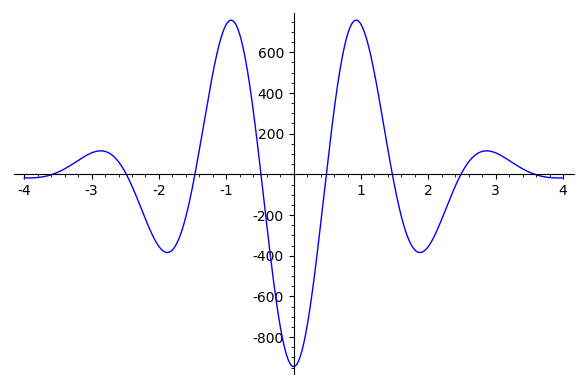

In [40]:
fprime = derivative(f, x, 10)
plot(fprime, (x, -4, 4))

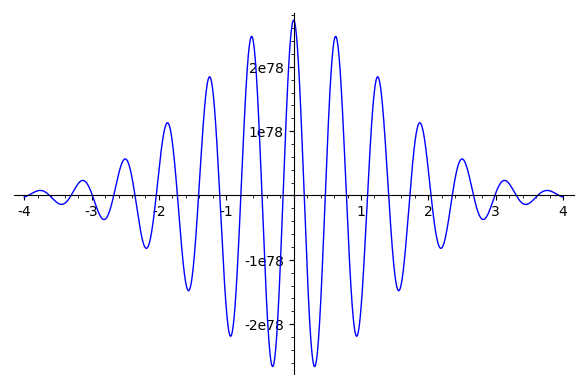

In [41]:
fprime = derivative(f, x, 100)
plot(fprime, (x, -4, 4))

In [10]:
derivative(f, x, 3)

-x^3*e^(-1/2*x^2) + 3*x*e^(-1/2*x^2)

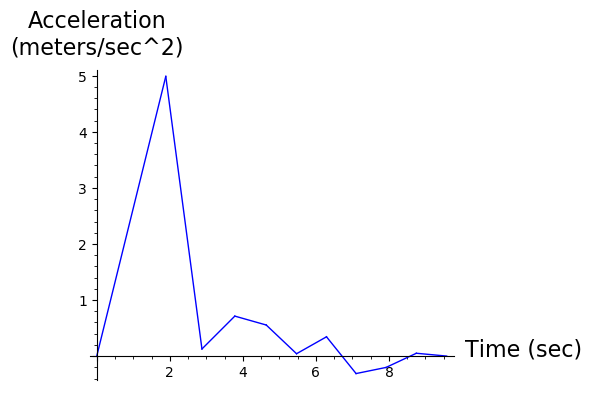

In [8]:
def get_spline_derivative(spline, order):
    return [[derivative(f, x, order), xl, xr] for [f, xl, xr] in spline]

def plot_piecewise(piecewise, color='blue'):
    ps = None
    for [f, xl, xr] in piecewise:
        p = plot(f, (x, xl, xr), color=color, axes_labels=['Time (sec)','Acceleration\n(meters/sec^2)'])
        if not ps:
            ps = p
        else:
            ps += p
    return ps
   
def zeros_vec(N):
    return vector([0.0]*N)

def get_spline(xs, ys):
    n = len(ys)-1
    a = vector(ys)
    b = zeros_vec(n)
    d = zeros_vec(n)
    h = vector(xs[1::])-vector(xs[0:-1])
    alpha = zeros_vec(n)
    for i in range(1, n):
        alpha[i] = 3*(a[i+1]-a[i])/h[i] - 3*(a[i]-a[i-1])/h[i-1]
    c = zeros_vec(n+1)
    l = zeros_vec(n+1)
    mu = zeros_vec(n+1)
    z = zeros_vec(n+1)
    l[0] = 1
    for i in range(1, n):
        l[i] = 2*(xs[i+1]-xs[i-1])-h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]
    l[n] = 1
    for j in range(n-1, -1, -1):
        c[j] = z[j]-mu[j]*c[j+1]
        b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])
    spline = []
    for i in range(n):
        f = a[i] + b[i]*(x-xs[i]) + c[i]*(x-xs[i])^2 + d[i]*(x-xs[i])^3
        spline.append([f, xs[i], xs[i+1]])
    return spline
        
ts = [0, 1.89, 2.88, 3.78, 4.64, 5.47, 6.29, 7.1, 7.92, 8.75, 9.58]
xs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
spline = get_spline(ts, xs)
plot_piecewise(get_spline_derivative(spline, 2))


In [28]:
spline

[[0.439910675277776*x^3 + 3.71960036784555*x, 0, 1.89000000000000],
 [-0.818442638354679*(x - 1.89000000000000)^3 + 2.49429352882499*(x - 1.89000000000000)^2 + 8.43381513732478*x - 5.93991060954383,
  1.89000000000000,
  2.88000000000000],
 [0.108511941539104*(x - 2.88000000000000)^3 + 0.0635188929115956*(x - 2.88000000000000)^2 + 10.9660494348440*x - 11.5822223723507,
  2.88000000000000,
  3.78000000000000],
 [-0.0307618434809071*(x - 3.78000000000000)^3 + 0.356501135067175*(x - 3.78000000000000)^2 + 11.3440674600249*x - 12.8805749988941,
  3.78000000000000,
  4.64000000000000],
 [-0.102808525789529*(x - 4.64000000000000)^3 + 0.277135578886435*(x - 4.64000000000000)^2 + 11.8889950340250*x - 15.1649369578760,
  4.64000000000000,
  5.47000000000000],
 [0.0613020668685699*(x - 5.47000000000000)^3 + 0.0211423496705087*(x - 5.47000000000000)^2 + 12.1365657147273*x - 16.3870144595581,
  5.47000000000000,
  6.29000000000000],
 [-0.134879571412769*(x - 6.29000000000000)^3 + 0.171945434167191*

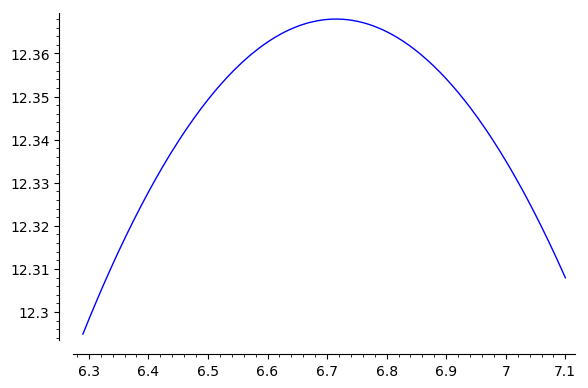

In [42]:
plot_piecewise(get_spline_derivative(spline[6:7], 1))

In [49]:
s = derivative(spline[6][0], x)

m = 0.343890868334381/(2*0.404638714238308)
s(m+spline[6][1])

12.3679634504301

In [44]:
s

[-0.134879571412769*(x - 6.29000000000000)^3 + 0.171945434167191*(x - 6.29000000000000)^2 + 12.2948976974742*x - 17.3349065171126,
 6.29000000000000,
 7.10000000000000]